In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [4]:
df= pd.read_csv('./breast-cancer.csv')

In [5]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
df=df.drop(['id'],axis=1)

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0}).astype(int)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
x =df.iloc[:,1:]
y =df.iloc[: , 0]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


## Gradient Boosting

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
reg = GradientBoostingClassifier( learning_rate=0.01,n_estimators=100) ## 100 decision tree  taking

In [16]:
reg.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01)

-- training accuracy

In [17]:
y_train_pred = reg.predict(x_train)

In [19]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [20]:
accuracy_score(y_train,y_train_pred)

0.989501312335958

In [21]:
confusion_matrix(y_train,y_train_pred)

array([[236,   0],
       [  4, 141]], dtype=int64)

In [22]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       236
           1       1.00      0.97      0.99       145

    accuracy                           0.99       381
   macro avg       0.99      0.99      0.99       381
weighted avg       0.99      0.99      0.99       381



-- selecting best learning rate value

In [27]:
learning_rates = [0.2,0.05,0.1,1.0,0.001,0.25,0.75]


for i in learning_rates:
    model =  GradientBoostingClassifier(learning_rate=i,n_estimators=100)
    model.fit(x_train,y_train)
    print('learning_rate ={}', format(i))
    print('test accuracy ={}', format(model.score(x_test,y_test)))
    print(  )

learning_rate ={} 0.2
test accuracy ={} 0.9521276595744681

learning_rate ={} 0.05
test accuracy ={} 0.9468085106382979

learning_rate ={} 0.1
test accuracy ={} 0.9574468085106383

learning_rate ={} 1.0
test accuracy ={} 0.9361702127659575

learning_rate ={} 0.001
test accuracy ={} 0.6436170212765957

learning_rate ={} 0.25
test accuracy ={} 0.9468085106382979

learning_rate ={} 0.75
test accuracy ={} 0.9574468085106383



In [28]:
learning_rates = [0.2,0.05,0.1,1.0,0.001,0.25,0.75]
test_acc =[]
lr =[]

for i in learning_rates:
    model =  GradientBoostingClassifier(learning_rate=i,n_estimators=100)
    model.fit(x_train,y_train)
    print('learning_rate ={}', format(i))
    print('test accuracy ={}', format(model.score(x_test,y_test)))
    test_acc.append(model.score(x_test, y_test))
    lr.append(i)
    print(  )

learning_rate ={} 0.2
test accuracy ={} 0.9468085106382979

learning_rate ={} 0.05
test accuracy ={} 0.9468085106382979

learning_rate ={} 0.1
test accuracy ={} 0.9574468085106383

learning_rate ={} 1.0
test accuracy ={} 0.9361702127659575

learning_rate ={} 0.001
test accuracy ={} 0.6436170212765957

learning_rate ={} 0.25
test accuracy ={} 0.9574468085106383

learning_rate ={} 0.75
test accuracy ={} 0.9627659574468085



In [29]:
test_acc

[0.9468085106382979,
 0.9468085106382979,
 0.9574468085106383,
 0.9361702127659575,
 0.6436170212765957,
 0.9574468085106383,
 0.9627659574468085]

In [30]:
lr

[0.2, 0.05, 0.1, 1.0, 0.001, 0.25, 0.75]

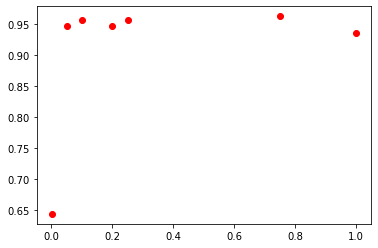

In [33]:
plt.scatter(lr,test_acc,color ='r')
plt.show()

## test performance

In [34]:
y_test_pred =reg.predict(x_test) 

In [35]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [36]:
accuracy_score(y_test,y_test_pred)

0.9521276595744681

In [37]:
confusion_matrix(y_test,y_test_pred)

array([[119,   2],
       [  7,  60]], dtype=int64)

In [38]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       121
           1       0.97      0.90      0.93        67

    accuracy                           0.95       188
   macro avg       0.96      0.94      0.95       188
weighted avg       0.95      0.95      0.95       188

